<a href="https://colab.research.google.com/github/Safayat777/my_new/blob/main/my_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set seeds for reproducibility
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
kaggle_credentails = json.load(open("kaggle.json"))

In [4]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [5]:
# Dataset Path
base_dir = '/content/drive/MyDrive/DataSet/ArsenicSkinImageBD'

In [6]:
print(os.listdir(base_dir))
print(len(os.listdir(base_dir)))
print(os.listdir(base_dir)[:5])

['infected', 'not_infected']
2
['infected', 'not_infected']


(244, 244, 3)


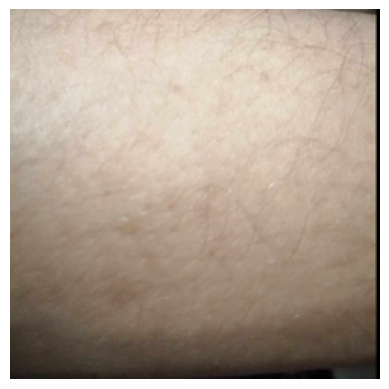

In [7]:
image_path = '/content/drive/MyDrive/DataSet/non_infected.png'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [8]:
image_path = '/content/drive/MyDrive/DataSet/non_infected.png'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[0.69803923 0.6509804  0.59607846]
  [0.7058824  0.65882355 0.6039216 ]
  [0.7137255  0.6666667  0.6117647 ]
  ...
  [0.07843138 0.07450981 0.05490196]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.7176471  0.67058825 0.6156863 ]
  [0.70980394 0.6627451  0.60784316]
  [0.7254902  0.6784314  0.62352943]
  ...
  [0.08627451 0.08235294 0.0627451 ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.7254902  0.6784314  0.62352943]
  [0.7294118  0.68235296 0.627451  ]
  [0.7411765  0.69411767 0.6392157 ]
  ...
  [0.10196079 0.08627451 0.07450981]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.1254902  0.08627451 0.08235294]
  [0.12941177 0.09019608 0.08627451]
  [0.13333334 0.09411765 0.09019608]
  ...
  [0.06666667 0.07843138 0.06666667]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.12156863 0.07843138 0.09019608]
  [0.1254902  0.08235294 0.08627451]


In [9]:
img_size = 128
batch_size = 32

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [11]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 7114 images belonging to 2 classes.


In [12]:
validation_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 1778 images belonging to 2 classes.


In [13]:
model = models.Sequential([

    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.GlobalAveragePooling2D(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [22]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 76s 341ms/step - accuracy: 0.9083 - loss: 0.2246 - val_accuracy: 0.8363 - val_loss: 0.3573
Epoch 2/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 76s 341ms/step - accuracy: 0.9204 - loss: 0.2047 - val_accuracy: 0.7160 - val_loss: 0.6975
Epoch 3/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 76s 341ms/step - accuracy: 0.9184 - loss: 0.1977 - val_accuracy: 0.7942 - val_loss: 0.4924
Epoch 4/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 75s 338ms/step - accuracy: 0.9296 - loss: 0.1858 - val_accuracy: 0.8166 - val_loss: 0.4268
Epoch 5/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 77s 344ms/step - accuracy: 0.9301 - loss: 0.1831 - val_accuracy: 0.8397 - val_loss: 0.3889


In [23]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.8288 - loss: 0.4219
Validation Accuracy: 83.98%


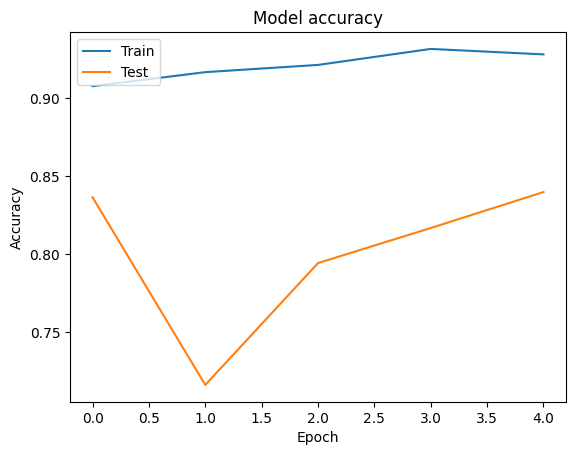

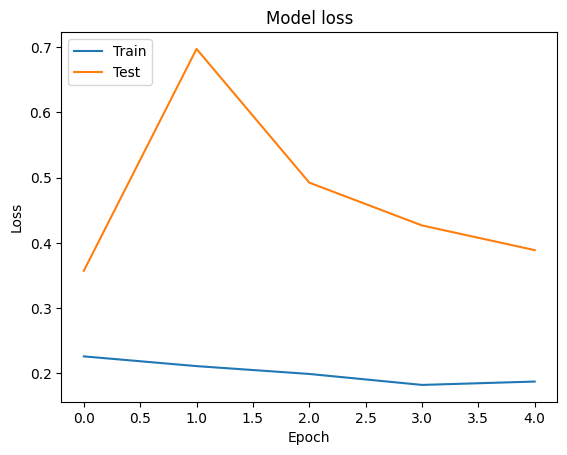

In [24]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [26]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [27]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))


In [28]:
# Example Usage
image_path = '/content/drive/MyDrive/DataSet/infected.png'
# image_path = '/content/drive/MyDrive/DataSet/non_infected.png'

predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Class Name: infected
